In [3]:
%config IPCompleter.greedy=True

In [4]:
#######################################################################################
#   Import Libraries needed
#######################################################################################

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pandas as pd
from os import path
import time
import gdown

In [5]:
#######################################################################################
#   Load Training Dataset
#######################################################################################

tinit = time.time()

# read train data set
# url = 'https://drive.google.com/file/d/1dTIWNpjlrnTQBIQtaGOh0jCRYZiAQO79/view?usp=sharing'
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# output = "twitterData.csv"
# gdown.download(path, output, quiet=False)
train_data_original = pd.read_csv("../twitterData.csv")

In [6]:
# Check form of data
train_data_original.head()

,Unnamed: 0,target,id,date,flag,user,text
0,680949,0,2249621587,Fri Jun 19 22:41:08 PDT 2009,NO_QUERY,sukumarpant,#brokenpromises...
1,406741,0,2059003515,Sat Jun 06 16:03:21 PDT 2009,NO_QUERY,MTMSparrow,David Carradine so sad. Thai's law not sure i...
2,1337108,4,2017466467,Wed Jun 03 08:26:14 PDT 2009,NO_QUERY,itsmemcee,A @ 415 B @ 425. Tell your bro i say congrats!
3,1560887,4,2186457254,Mon Jun 15 18:52:04 PDT 2009,NO_QUERY,jdfreivald,@littlefluffycat Indeed.
4,1466295,4,2064458395,Sun Jun 07 06:19:20 PDT 2009,NO_QUERY,CrazyHan,Completed Race 4 Life in 58mins with girlies f...


<AxesSubplot:ylabel='target'>

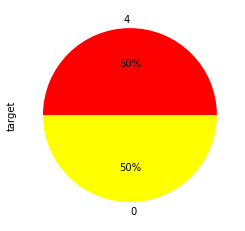

In [7]:
# Check distribution of target variables
train_data_original['target'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow"])

In [8]:
# Set part of dataset to be transformed
train_data = train_data_original  #[0:200]

In [9]:
#######################################################################################
#   Text preprocessing and transformation of string labels to numeric
#######################################################################################

# Transform "0 and 4" categories to boolean for binary classification
le = preprocessing.LabelEncoder()
le.fit(train_data["target"])

LabelEncoder()

In [24]:
# Show the "transformed" categories
y = le.transform(train_data["target"])
train_data = train_data[:1000]
# train_data['text']=train_data['text'][:1000]
y = y[:1000]

In [28]:
train_data

,Unnamed: 0,target,id,date,flag,user,text
0,680949,0,2249621587,Fri Jun 19 22:41:08 PDT 2009,NO_QUERY,sukumarpant,brokenpromises
1,406741,0,2059003515,Sat Jun 06 16:03:21 PDT 2009,NO_QUERY,MTMSparrow,david carradine so sad thais law not sure if i...
2,1337108,4,2017466467,Wed Jun 03 08:26:14 PDT 2009,NO_QUERY,itsmemcee,a 415 b 425 tell your bro i say congrats
3,1560887,4,2186457254,Mon Jun 15 18:52:04 PDT 2009,NO_QUERY,jdfreivald,indeed
4,1466295,4,2064458395,Sun Jun 07 06:19:20 PDT 2009,NO_QUERY,CrazyHan,completed race 4 life in 58mins with girlies f...
...,...,...,...,...,...,...,...
995,1579723,4,2189974812,Tue Jun 16 01:24:56 PDT 2009,NO_QUERY,onegirlinmelb,its not my birthday just had my work celebrati...
996,755546,0,2288368411,Mon Jun 22 19:04:16 PDT 2009,NO_QUERY,nicolesoskin,just got home from the bfs hes going away for ...
997,516568,0,2191098485,Tue Jun 16 04:30:59 PDT 2009,NO_QUERY,herhoneydew,trying to find a good place for my english mas...
998,1198030,4,1985069573,Sun May 31 16:22:07 PDT 2009,NO_QUERY,yoovilla,yeah i know im learning fast though you should...


In [29]:
# Transform all tweets content to lower case
train_data['text'] = train_data['text'].apply(lambda x: str(x).lower())
# train_data['text'].iloc[1000]


<ipython-input-29-4d14f5b73c5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'] = train_data['text'].apply(lambda x: str(x).lower())


In [30]:
# Remove url links
import re
train_data['text'] = train_data['text'].apply(lambda x: re.sub(r'http\S+', '', x))
# train_data['text'].iloc[1000]

<ipython-input-30-502ab2165cfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'] = train_data['text'].apply(lambda x: re.sub(r'http\S+', '', x))


In [31]:
# Remove @ tags refer to names of users
train_data['text'] = train_data['text'].apply(lambda x: re.sub(r'\S*@\S+', '', x))
# train_data['text'].iloc[1000]

<ipython-input-31-8bdef96b29a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'] = train_data['text'].apply(lambda x: re.sub(r'\S*@\S+', '', x))


In [32]:
def removeSpecialChars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

In [33]:
# Remove special characters
train_data['text'] = train_data['text'].apply(lambda x: removeSpecialChars(x))
# train_data['text'].iloc[1000]

<ipython-input-33-fd52f7bc76ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'] = train_data['text'].apply(lambda x: removeSpecialChars(x))


In [34]:
# Transform "textual" content to "numeric" to be able to use scikit functions
count_vectorizer = CountVectorizer() # stop_words=ENGLISH_STOP_WORDS)
X_train_counts = count_vectorizer.fit_transform(train_data['text'])

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply transformation of the numeric matrix to account for frequencies
# of appearances and give lower priority to words that appear in high
# frequencies in all document categories
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.transform(X_train_counts)

tfidf_transformer = TfidfVectorizer(max_features=100, min_df=10, max_df=0.8)
X_train_tfidf = tfidf_transformer.fit_transform(train_data['text'])

In [36]:
# # Use truncatedSVD to apply LSI (Latent Semantic Indexing) with n=75 found by mini study
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import TruncatedSVD
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import accuracy_score

# # Apply truncated SVD - n=75 / Found by sensitivity analysis with Random Forest Classifier
# svd = TruncatedSVD(n_components = 75, random_state=42)
# Xnew = svd.fit_transform(X_train_tfidf)

In [37]:
# X_train_counts

In [38]:
X_train_tfidf.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.42401367, ..., 0.29800933, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [39]:
# Preparation for grid search : split train set to train/validation in order
# not to overfit classifiers hyperparameters

from sklearn.model_selection import train_test_split

# Split the train dataset in two equal parts : train_gs , test_gs
# to use in gridsearch for training/testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_tfidf.todense(), y, test_size=0.3, random_state=0, stratify = y)

In [ ]:
# # from sklearn.ensemble import RandomForestClassifier
# # from sklearn.svm import SVC
# # from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import precision_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

# # List the classifiers to apply gridsearch
# # svc = SVC()
# # rf = RandomForestClassifier()
# # mnnb = MultinomialNB()
# lr_clf = LogisticRegression()

# # score functions to be used : ['accuracy','precision_micro','recall_micro','f1_micro']
# mscoring = {'prec_macro': make_scorer(precision_score, average='macro'),
# #            'acc':'accuracy', 
#            'rec_macro' : make_scorer(recall_score,average ='macro'),
#            'f1_macro' : make_scorer(f1_score,average ='macro')}

# # Parameters to be grid searched for each classifier

# # svc_param_grid = [ {'kernel':['rbf'], 'gamma':[10**(n) for n in range(-3,3,1)], 
# #                     'C':[10**(n) for n in range(-3,3,1)]}]
# # svc_param_grid_lnr = [ {'kernel':['linear'],'C':[10**(n) for n in range(-3,3,1)]} ]

# # rf_param_grid =[ {'n_estimators':[n for n in range(5,30,5)], 'max_features':['sqrt','log2',None,0.2,0.5,0.7]} ]

# # mnnb_param_grid =[ {'alpha':[10**n for n in range(-3,4,1)] } ]

# lr_clf_param_grid=[ {'penalty': ['l2'], 'C': [0.001]} ]

In [ ]:
# # Logistic Regression grid search

# # Set gridsearch parameters to be used
# gs_lr = GridSearchCV(lr_clf, param_grid = lr_clf_param_grid, n_jobs=-1,
#                           scoring=mscoring, refit='f1_macro', cv=5)

# # Perform gridsearch to data
# t0=time.time()
# gs_lr.fit(Xtrain,ytrain)

# # Print time needed for calculations
# print ("#### Logistic Regression grid search ###")
# print ("Logistic Regression grid-search time : ", round(time.time()-t0, 3), "s")
# print ("Best parameters found : ", gs_lr.best_params_)
# print ("Best score found : ", gs_lr.best_score_)

In [40]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cpu


In [41]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        
        # Linear function 1: vocab_size --> 500
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 500 --> 500
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 500 --> 3
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out1 = self.fc1(x)
        # Non-linearity 1
        out2 = self.relu1(out1)

        # Linear function 2
        out3 = self.fc2(out2)
        # Non-linearity 2
        out4 = self.relu2(out3)

        # Linear function 3 (readout)
        out5 = self.fc3(out4)

        return F.softmax(out5, dim=1)


In [42]:
Xtrain

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
zz = Xtrain[:, 0:-1]

In [44]:
ytrain

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,

In [27]:
import torch
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return torch.sparse.LongTensor([coo.row.tolist(), coo.col.tolist()],
                                  torch.LongTensor(coo.data.astype(np.float64))) #indices, coo.data, coo.shape)

In [45]:
VOCAB_SIZE = Xtrain.shape[1]-1

input_dim = VOCAB_SIZE
hidden_dim = 100
output_dim = 2
num_epochs = 10

ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=0.005)

In [46]:
# import numpy as np
# from scipy.sparse import csr_matrix
# import torch

# __author__ = 'Andrea Esuli'

# Acsr = csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])
# print('Acsr',Acsr)

# Acoo = Acsr.tocoo()
# print('Acoo',Acoo)

# Apt = torch.sparse.LongTensor(torch.LongTensor([Acoo.row.tolist(), Acoo.col.tolist()]),
#                               torch.LongTensor(Acoo.data.astype(np.int32)))
# print('Apt',Apt)

In [47]:
from torch.utils.data import Dataset, DataLoader
from torch import from_numpy, tensor
import numpy as np

class sentimentsDataset(Dataset):
    # Initialize your data, download, etc.
    def __init__(self, X, y):
        self.len = X.shape[0]
        self.x_data = torch.from_numpy(X[:,0:-1]).to_sparse() 
        self.y_data = torch.from_numpy(y[:]).to_sparse()
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [48]:
# from torch.utils.data import Dataset, DataLoader
# from torch import from_numpy, tensor
# import numpy as np

# class sentimentsDataset(Dataset):
#     # Initialize your data, download, etc.
#     def __init__(self, X, y):
#         self.len = X.shape[0]
#         self.x_data = torch.from_numpy(X[:,0:-1]) #convert_sparse_matrix_to_sparse_tensor(X[:, 0:-1])
#         self.y_data = torch.from_numpy(y[:,[-1]] # convert_sparse_matrix_to_sparse_tensor(y[:]) #(y[:, [-1]])

#     def __getitem__(self, index):
#         return self.x_data[index], self.y_data[index]
# # #         xdense = self.x_data[index].todense()
# # #         ydense = y
# # #         return torch.from_numpy(xdense[:,0:-1]), torch.from_numpy(ydense[:]) #self.x_data[index].toarray(), self.y_data[index].toarray()

#     def __len__(self):
#         return self.len

In [49]:
dataset = sentimentsDataset(Xtrain,ytrain)
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True)#,num_workers=2)

In [50]:
from tqdm import tqdm # for progressbar
OUTPUT_FOLDER=''
# Open the file for writing loss
ffnn_loss_file_name = OUTPUT_FOLDER + 'ffnn_bow_class_big_loss_500_epoch_100_less_lr.csv'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss')
f.write('\n')
losses = []
iter = 0



# Start training
for epoch in tqdm( range(num_epochs) ):
#     if (epoch+1) % 25 == 0:
    print("Epoch completed: " + str(epoch+1))
    train_loss = 0
    i=0
    for index, data in enumerate(train_loader, 0) :
        
        # Get data
        inputs, labels = data
        
        # Wrap them in Variable
        inputs, labels = tensor(inputs), tensor(labels)
#         print(inputs)
#         print(labels)
        
        # Clearing the accumulated gradients
        optimizer.zero_grad()
       
        # Forward pass to get output
        y_pred = ff_nn_bow_model.forward(inputs.float())
        print(y_pred)
        print(labels)

        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(y_pred, labels)
        # Accumulating the loss over time
        train_loss += loss.item()

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
    f.write(str((epoch+1)) + "," + str(train_loss / Xtrain.shape[0]))
    f.write('\n')
    train_loss = 0

f.close()

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]<ipython-input-50-dc931736df9d>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = tensor(inputs), tensor(labels)


Epoch completed: 1
tensor([[0.4842, 0.5158],
        [0.4842, 0.5158],
        [0.4816, 0.5184],
        [0.4829, 0.5171],
        [0.4864, 0.5136],
        [0.4810, 0.5190],
        [0.4772, 0.5228],
        [0.4803, 0.5197],
        [0.4811, 0.5189],
        [0.4780, 0.5220],
        [0.4846, 0.5154],
        [0.4831, 0.5169],
        [0.4803, 0.5197],
        [0.4833, 0.5167],
        [0.4818, 0.5182],
        [0.4805, 0.5195],
        [0.4847, 0.5153],
        [0.4862, 0.5138],
        [0.4870, 0.5130],
        [0.4866, 0.5134],
        [0.4818, 0.5182],
        [0.4854, 0.5146],
        [0.4803, 0.5197],
        [0.4808, 0.5192],
        [0.4893, 0.5107],
        [0.4927, 0.5073],
        [0.4889, 0.5111],
        [0.4860, 0.5140],
        [0.4848, 0.5152],
        [0.4852, 0.5148],
        [0.4852, 0.5148],
        [0.4774, 0.5226]], grad_fn=<SoftmaxBackward>)
tensor([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 1])
tensor([

        [0.4864, 0.5136]], grad_fn=<SoftmaxBackward>)
tensor([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0])
tensor([[0.4877, 0.5123],
        [0.4851, 0.5149],
        [0.4789, 0.5211],
        [0.4869, 0.5131],
        [0.4835, 0.5165],
        [0.4862, 0.5138],
        [0.4880, 0.5120],
        [0.4827, 0.5173],
        [0.4845, 0.5155],
        [0.4920, 0.5080],
        [0.4838, 0.5162],
        [0.4805, 0.5195],
        [0.4856, 0.5144],
        [0.4839, 0.5161],
        [0.4811, 0.5189],
        [0.4875, 0.5125],
        [0.4810, 0.5190],
        [0.4831, 0.5169],
        [0.4807, 0.5193],
        [0.4904, 0.5096],
        [0.4817, 0.5183],
        [0.4794, 0.5206],
        [0.4853, 0.5147],
        [0.4817, 0.5183],
        [0.4816, 0.5184],
        [0.4843, 0.5157],
        [0.4854, 0.5146],
        [0.4864, 0.5136],
        [0.4823, 0.5177],
        [0.4851, 0.5149],
        [0.4769, 0.5231],
        [0.4842, 0.5158]], 

 10%|████████▎                                                                          | 1/10 [00:00<00:03,  2.46it/s]


tensor([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1])
Epoch completed: 2
tensor([[0.4831, 0.5169],
        [0.4913, 0.5087],
        [0.4851, 0.5149],
        [0.4838, 0.5162],
        [0.4861, 0.5139],
        [0.4845, 0.5155],
        [0.4833, 0.5167],
        [0.4805, 0.5195],
        [0.4831, 0.5169],
        [0.4868, 0.5132],
        [0.4829, 0.5171],
        [0.4854, 0.5146],
        [0.4804, 0.5196],
        [0.4871, 0.5129],
        [0.4814, 0.5186],
        [0.4767, 0.5233],
        [0.4894, 0.5106],
        [0.4854, 0.5146],
        [0.4823, 0.5177],
        [0.4765, 0.5235],
        [0.4817, 0.5183],
        [0.4827, 0.5173],
        [0.4877, 0.5123],
        [0.4888, 0.5112],
        [0.4803, 0.5197],
        [0.4845, 0.5155],
        [0.4911, 0.5089],
        [0.4831, 0.5169],
        [0.4846, 0.5154],
        [0.4787, 0.5213],
        [0.4783, 0.5217],
        [0.4834, 0.5166]], grad_fn=<SoftmaxBackward>)
tensor([0, 1, 0, 0,

tensor([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0])
tensor([[0.4802, 0.5198],
        [0.4791, 0.5209],
        [0.4833, 0.5167],
        [0.4863, 0.5137],
        [0.4831, 0.5169],
        [0.4834, 0.5166],
        [0.4849, 0.5151],
        [0.4837, 0.5163],
        [0.4771, 0.5229],
        [0.4837, 0.5163],
        [0.4849, 0.5151],
        [0.4808, 0.5192],
        [0.4866, 0.5134],
        [0.4829, 0.5171],
        [0.4820, 0.5180],
        [0.4829, 0.5171],
        [0.4851, 0.5149],
        [0.4819, 0.5181],
        [0.4831, 0.5169],
        [0.4856, 0.5144],
        [0.4836, 0.5164],
        [0.4878, 0.5122],
        [0.4755, 0.5245],
        [0.4860, 0.5140],
        [0.4842, 0.5158],
        [0.4831, 0.5169],
        [0.4831, 0.5169],
        [0.4785, 0.5215],
        [0.4843, 0.5157],
        [0.4765, 0.5235],
        [0.4836, 0.5164],
        [0.4788, 0.5212]], grad_fn=<SoftmaxBackward>)
tensor([0, 1, 1, 1, 0, 1, 0

 20%|████████████████▌                                                                  | 2/10 [00:00<00:03,  2.56it/s]


Epoch completed: 3
tensor([[0.4771, 0.5229],
        [0.4824, 0.5176],
        [0.4895, 0.5105],
        [0.4863, 0.5137],
        [0.4792, 0.5208],
        [0.4884, 0.5116],
        [0.4833, 0.5167],
        [0.4819, 0.5181],
        [0.4807, 0.5193],
        [0.4857, 0.5143],
        [0.4856, 0.5144],
        [0.4870, 0.5130],
        [0.4795, 0.5205],
        [0.4753, 0.5247],
        [0.4775, 0.5225],
        [0.4874, 0.5126],
        [0.4822, 0.5178],
        [0.4781, 0.5219],
        [0.4771, 0.5229],
        [0.4863, 0.5137],
        [0.4788, 0.5212],
        [0.4850, 0.5150],
        [0.4837, 0.5163],
        [0.4818, 0.5182],
        [0.4826, 0.5174],
        [0.4846, 0.5154],
        [0.4830, 0.5170],
        [0.4848, 0.5152],
        [0.4765, 0.5235],
        [0.4808, 0.5192],
        [0.4821, 0.5179],
        [0.4809, 0.5191]], grad_fn=<SoftmaxBackward>)
tensor([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 1])
tensor(

 30%|████████████████████████▉                                                          | 3/10 [00:01<00:02,  2.63it/s]

tensor([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1])
tensor([[0.4763, 0.5237],
        [0.4805, 0.5195],
        [0.4840, 0.5160],
        [0.4793, 0.5207],
        [0.4868, 0.5132],
        [0.4800, 0.5200],
        [0.4798, 0.5202],
        [0.4782, 0.5218],
        [0.4781, 0.5219],
        [0.4756, 0.5244],
        [0.4778, 0.5222],
        [0.4807, 0.5193],
        [0.4755, 0.5245],
        [0.4882, 0.5118],
        [0.4838, 0.5162],
        [0.4834, 0.5166],
        [0.4836, 0.5164],
        [0.4800, 0.5200],
        [0.4795, 0.5205],
        [0.4825, 0.5175],
        [0.4849, 0.5151],
        [0.4814, 0.5186],
        [0.4854, 0.5146],
        [0.4809, 0.5191],
        [0.4820, 0.5180],
        [0.4808, 0.5192],
        [0.4816, 0.5184],
        [0.4815, 0.5185],
        [0.4822, 0.5178],
        [0.4786, 0.5214],
        [0.4780, 0.5220],
        [0.4754, 0.5246]], grad_fn=<SoftmaxBackward>)
tensor([1, 0, 1, 0, 1, 1, 1

        1, 0, 1, 1, 1, 1, 1, 1])
tensor([[0.4800, 0.5200],
        [0.4853, 0.5147],
        [0.4773, 0.5227],
        [0.4880, 0.5120],
        [0.4805, 0.5195],
        [0.4808, 0.5192],
        [0.4812, 0.5188],
        [0.4768, 0.5232],
        [0.4792, 0.5208],
        [0.4744, 0.5256],
        [0.4825, 0.5175],
        [0.4794, 0.5206],
        [0.4832, 0.5168],
        [0.4795, 0.5205],
        [0.4777, 0.5223],
        [0.4829, 0.5171],
        [0.4818, 0.5182],
        [0.4787, 0.5213],
        [0.4850, 0.5150],
        [0.4807, 0.5193],
        [0.4839, 0.5161],
        [0.4784, 0.5216],
        [0.4801, 0.5199],
        [0.4757, 0.5243],
        [0.4809, 0.5191],
        [0.4774, 0.5226],
        [0.4805, 0.5195],
        [0.4796, 0.5204],
        [0.4788, 0.5212],
        [0.4769, 0.5231],
        [0.4825, 0.5175],
        [0.4826, 0.5174]], grad_fn=<SoftmaxBackward>)
tensor([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0

 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:02,  2.95it/s]


tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 1])
tensor([[0.4792, 0.5208],
        [0.4778, 0.5222],
        [0.4751, 0.5249],
        [0.4820, 0.5180],
        [0.4792, 0.5208],
        [0.4807, 0.5193],
        [0.4824, 0.5176],
        [0.4784, 0.5216],
        [0.4801, 0.5199],
        [0.4779, 0.5221],
        [0.4813, 0.5187],
        [0.4809, 0.5191],
        [0.4802, 0.5198],
        [0.4820, 0.5180],
        [0.4777, 0.5223],
        [0.4756, 0.5244],
        [0.4873, 0.5127],
        [0.4796, 0.5204],
        [0.4812, 0.5188],
        [0.4813, 0.5187],
        [0.4842, 0.5158],
        [0.4784, 0.5216],
        [0.4839, 0.5161],
        [0.4808, 0.5192],
        [0.4865, 0.5135],
        [0.4797, 0.5203],
        [0.4836, 0.5164],
        [0.4878, 0.5122],
        [0.4747, 0.5253],
        [0.4802, 0.5198],
        [0.4802, 0.5198],
        [0.4781, 0.5219]], grad_fn=<SoftmaxBackward>)
tensor([0, 1, 1, 1, 1, 1, 

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  3.18it/s]


tensor([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1])
tensor([[0.4738, 0.5262],
        [0.4783, 0.5217],
        [0.4764, 0.5236],
        [0.4781, 0.5219],
        [0.4769, 0.5231],
        [0.4765, 0.5235],
        [0.4791, 0.5209],
        [0.4815, 0.5185],
        [0.4787, 0.5213],
        [0.4838, 0.5162],
        [0.4792, 0.5208],
        [0.4766, 0.5234],
        [0.4778, 0.5222],
        [0.4776, 0.5224],
        [0.4793, 0.5207],
        [0.4812, 0.5188],
        [0.4833, 0.5167],
        [0.4676, 0.5324],
        [0.4778, 0.5222],
        [0.4817, 0.5183],
        [0.4768, 0.5232],
        [0.4762, 0.5238],
        [0.4857, 0.5143],
        [0.4799, 0.5201],
        [0.4779, 0.5221],
        [0.4790, 0.5210],
        [0.4790, 0.5210],
        [0.4844, 0.5156],
        [0.4822, 0.5178],
        [0.4752, 0.5248],
        [0.4809, 0.5191],
        [0.4771, 0.5229]], grad_fn=<SoftmaxBackward>)
tensor([1, 1, 0, 0, 1, 0, 

        1, 1, 0, 1, 0, 1, 0, 1])
tensor([[0.4803, 0.5197],
        [0.4758, 0.5242],
        [0.4821, 0.5179],
        [0.4818, 0.5182],
        [0.4776, 0.5224],
        [0.4751, 0.5249],
        [0.4716, 0.5284],
        [0.4820, 0.5180],
        [0.4831, 0.5169],
        [0.4864, 0.5136],
        [0.4840, 0.5160],
        [0.4865, 0.5135],
        [0.4718, 0.5282],
        [0.4795, 0.5205],
        [0.4807, 0.5193],
        [0.4816, 0.5184],
        [0.4775, 0.5225],
        [0.4741, 0.5259],
        [0.4768, 0.5232],
        [0.4817, 0.5183],
        [0.4867, 0.5133],
        [0.4745, 0.5255],
        [0.4828, 0.5172],
        [0.4821, 0.5179],
        [0.4791, 0.5209],
        [0.4811, 0.5189],
        [0.4833, 0.5167],
        [0.4788, 0.5212],
        [0.4767, 0.5233],
        [0.4758, 0.5242],
        [0.4761, 0.5239],
        [0.4787, 0.5213]], grad_fn=<SoftmaxBackward>)
tensor([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:01,  3.16it/s]


tensor([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0])
tensor([[0.4755, 0.5245],
        [0.4754, 0.5246],
        [0.4834, 0.5166],
        [0.4808, 0.5192],
        [0.4788, 0.5212],
        [0.4840, 0.5160],
        [0.4800, 0.5200],
        [0.4804, 0.5196],
        [0.4793, 0.5207],
        [0.4805, 0.5195],
        [0.4745, 0.5255],
        [0.4754, 0.5246],
        [0.4818, 0.5182],
        [0.4762, 0.5238],
        [0.4771, 0.5229],
        [0.4759, 0.5241],
        [0.4771, 0.5229],
        [0.4791, 0.5209],
        [0.4774, 0.5226],
        [0.4823, 0.5177],
        [0.4797, 0.5203],
        [0.4821, 0.5179],
        [0.4869, 0.5131],
        [0.4802, 0.5198],
        [0.4794, 0.5206],
        [0.4826, 0.5174],
        [0.4798, 0.5202],
        [0.4720, 0.5280],
        [0.4728, 0.5272],
        [0.4785, 0.5215],
        [0.4762, 0.5238],
        [0.4799, 0.5201]], grad_fn=<SoftmaxBackward>)
tensor([0, 0, 0, 0, 1, 0, 

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:02<00:00,  3.15it/s]


tensor([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0])
tensor([[0.4765, 0.5235],
        [0.4764, 0.5236],
        [0.4757, 0.5243],
        [0.4773, 0.5227],
        [0.4751, 0.5249],
        [0.4748, 0.5252],
        [0.4774, 0.5226],
        [0.4821, 0.5179],
        [0.4754, 0.5246],
        [0.4736, 0.5264],
        [0.4725, 0.5275],
        [0.4807, 0.5193],
        [0.4739, 0.5261],
        [0.4793, 0.5207],
        [0.4775, 0.5225],
        [0.4734, 0.5266],
        [0.4748, 0.5252],
        [0.4783, 0.5217],
        [0.4760, 0.5240],
        [0.4790, 0.5210],
        [0.4829, 0.5171],
        [0.4762, 0.5238],
        [0.4814, 0.5186],
        [0.4745, 0.5255],
        [0.4764, 0.5236],
        [0.4826, 0.5174],
        [0.4850, 0.5150],
        [0.4778, 0.5222],
        [0.4774, 0.5226],
        [0.4787, 0.5213],
        [0.4751, 0.5249],
        [0.4776, 0.5224]], grad_fn=<SoftmaxBackward>)
tensor([1, 0, 1, 1, 0, 1, 

        [0.4780, 0.5220]], grad_fn=<SoftmaxBackward>)
tensor([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1])
tensor([[0.4772, 0.5228],
        [0.4705, 0.5295],
        [0.4787, 0.5213],
        [0.4799, 0.5201],
        [0.4732, 0.5268],
        [0.4791, 0.5209],
        [0.4745, 0.5255],
        [0.4746, 0.5254],
        [0.4809, 0.5191],
        [0.4781, 0.5219],
        [0.4804, 0.5196],
        [0.4764, 0.5236],
        [0.4742, 0.5258],
        [0.4789, 0.5211],
        [0.4767, 0.5233],
        [0.4742, 0.5258],
        [0.4779, 0.5221],
        [0.4847, 0.5153],
        [0.4770, 0.5230],
        [0.4784, 0.5216],
        [0.4829, 0.5171],
        [0.4740, 0.5260],
        [0.4782, 0.5218],
        [0.4752, 0.5248],
        [0.4807, 0.5193],
        [0.4745, 0.5255],
        [0.4814, 0.5186],
        [0.4805, 0.5195],
        [0.4689, 0.5311],
        [0.4825, 0.5175],
        [0.4811, 0.5189],
        [0.4768, 0.5232]], 

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:02<00:00,  3.05it/s]


tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1])
tensor([[0.4841, 0.5159],
        [0.4760, 0.5240],
        [0.4735, 0.5265],
        [0.4803, 0.5197],
        [0.4740, 0.5260],
        [0.4806, 0.5194],
        [0.4800, 0.5200],
        [0.4651, 0.5349],
        [0.4769, 0.5231],
        [0.4786, 0.5214],
        [0.4777, 0.5223],
        [0.4741, 0.5259],
        [0.4811, 0.5189],
        [0.4754, 0.5246],
        [0.4823, 0.5177],
        [0.4789, 0.5211],
        [0.4770, 0.5230],
        [0.4802, 0.5198],
        [0.4756, 0.5244],
        [0.4716, 0.5284],
        [0.4792, 0.5208],
        [0.4772, 0.5228],
        [0.4753, 0.5247],
        [0.4741, 0.5259],
        [0.4766, 0.5234],
        [0.4784, 0.5216],
        [0.4765, 0.5235],
        [0.4817, 0.5183],
        [0.4765, 0.5235],
        [0.4793, 0.5207],
        [0.4791, 0.5209],
        [0.4787, 0.5213]], grad_fn=<SoftmaxBackward>)
tensor([0, 1, 1, 1, 1, 1, 

        [0.4727, 0.5273]], grad_fn=<SoftmaxBackward>)
tensor([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 0])
tensor([[0.4823, 0.5177],
        [0.4734, 0.5266],
        [0.4790, 0.5210],
        [0.4781, 0.5219],
        [0.4766, 0.5234],
        [0.4744, 0.5256],
        [0.4756, 0.5244],
        [0.4717, 0.5283],
        [0.4751, 0.5249],
        [0.4728, 0.5272],
        [0.4756, 0.5244],
        [0.4757, 0.5243],
        [0.4702, 0.5298],
        [0.4756, 0.5244],
        [0.4770, 0.5230],
        [0.4768, 0.5232],
        [0.4764, 0.5236],
        [0.4796, 0.5204],
        [0.4762, 0.5238],
        [0.4727, 0.5273],
        [0.4705, 0.5295],
        [0.4755, 0.5245],
        [0.4756, 0.5244],
        [0.4772, 0.5228],
        [0.4751, 0.5249],
        [0.4746, 0.5254],
        [0.4752, 0.5248],
        [0.4761, 0.5239],
        [0.4775, 0.5225],
        [0.4777, 0.5223],
        [0.4786, 0.5214],
        [0.4785, 0.5215]], 

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:02<00:00,  3.10it/s]


tensor([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 0])
tensor([[0.4784, 0.5216],
        [0.4740, 0.5260],
        [0.4755, 0.5245],
        [0.4736, 0.5264],
        [0.4769, 0.5231],
        [0.4724, 0.5276],
        [0.4697, 0.5303],
        [0.4727, 0.5273],
        [0.4687, 0.5313],
        [0.4752, 0.5248],
        [0.4725, 0.5275],
        [0.4725, 0.5275],
        [0.4684, 0.5316],
        [0.4752, 0.5248],
        [0.4791, 0.5209],
        [0.4762, 0.5238],
        [0.4689, 0.5311],
        [0.4821, 0.5179],
        [0.4727, 0.5273],
        [0.4653, 0.5347],
        [0.4787, 0.5213],
        [0.4696, 0.5304],
        [0.4726, 0.5274],
        [0.4761, 0.5239],
        [0.4672, 0.5328],
        [0.4750, 0.5250],
        [0.4680, 0.5320],
        [0.4726, 0.5274],
        [0.4703, 0.5297],
        [0.4735, 0.5265],
        [0.4727, 0.5273],
        [0.4765, 0.5235]], grad_fn=<SoftmaxBackward>)
tensor([1, 0, 1, 1, 0, 0, 

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.13it/s]


tensor([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 1])
tensor([[0.4756, 0.5244],
        [0.4739, 0.5261],
        [0.4745, 0.5255],
        [0.4745, 0.5255],
        [0.4737, 0.5263],
        [0.4702, 0.5298],
        [0.4723, 0.5277],
        [0.4745, 0.5255],
        [0.4746, 0.5254],
        [0.4750, 0.5250],
        [0.4722, 0.5278],
        [0.4698, 0.5302],
        [0.4730, 0.5270],
        [0.4750, 0.5250],
        [0.4712, 0.5288],
        [0.4716, 0.5284],
        [0.4780, 0.5220],
        [0.4831, 0.5169],
        [0.4745, 0.5255],
        [0.4729, 0.5271],
        [0.4769, 0.5231],
        [0.4682, 0.5318],
        [0.4782, 0.5218],
        [0.4771, 0.5229],
        [0.4747, 0.5253],
        [0.4716, 0.5284],
        [0.4716, 0.5284],
        [0.4691, 0.5309],
        [0.4788, 0.5212],
        [0.4747, 0.5253],
        [0.4711, 0.5289],
        [0.4756, 0.5244]], grad_fn=<SoftmaxBackward>)
tensor([0, 0, 0, 1, 1, 1, 

In [51]:
test_dataset = sentimentsDataset(Xtest,ytest)
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=ytest.shape[0],
                          shuffle=False)#,num_workers=2)

In [52]:
from sklearn.metrics import classification_report

# bow_ff_nn_predictions = ff_nn_bow_model_bow_model()

for index, data in enumerate(test_loader, 0):
    
    print(index)
        
    # Get data
    testInputs, testLabels = data

    # Wrap them in Variable
    testInputs, testLabels = tensor(testInputs), tensor(testLabels)
    
    # Forward pass to get output
    bow_ff_nn_predictions = ff_nn_bow_model(testInputs.float())

# print(classification_report(ytest,bow_ff_nn_predictions))
# ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)
# print(len(ffnn_loss_df))
# print(ffnn_loss_df.columns)
# ffnn_plt_500_padding_100_epochs = ffnn_loss_df[' loss'].plot()
# fig = ffnn_plt_500_padding_100_epochs.get_figure()
# fig.savefig(OUTPUT_FOLDER + 'plots/' + "ffnn_.pdf")

0


<ipython-input-52-66e978d7f814>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testInputs, testLabels = tensor(testInputs), tensor(testLabels)


C:\Users\odygs\PortableSoftware\Winpython64-3.8.5.0\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.54      1.00      0.70       161

    accuracy                           0.54       300
   macro avg       0.27      0.50      0.35       300
weighted avg       0.29      0.54      0.37       300

10
Index(['iter', ' loss'], dtype='object')


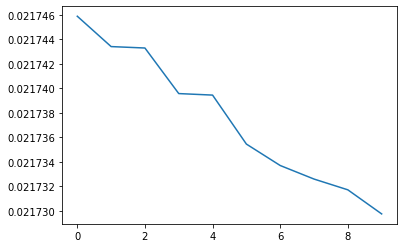

In [53]:
ypred = torch.argmax(bow_ff_nn_predictions, dim=1).numpy()

print(classification_report(ytest,ypred))
ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)
print(len(ffnn_loss_df))
print(ffnn_loss_df.columns)
ffnn_plt_500_padding_100_epochs = ffnn_loss_df[' loss'].plot()
fig = ffnn_plt_500_padding_100_epochs.get_figure()
# fig.savefig(OUTPUT_FOLDER + 'plots/' + "ffnn_.pdf")